<a href="https://colab.research.google.com/github/alessandrossC/Detecting_Fake_News/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import plotly.express as px
import matplotlib.pyplot as plt

from wordcloud import WordCloud

pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = (7, 4)

In [35]:
df = pd.read_csv('/content/fake_news_full_data.csv', sep=None, engine='python')
print(df.head())

   Unnamed: 0                                              title  \
0           0               Earthquake hits off Papua New Guinea   
1           1  CINDY MCCAIN Reportedly Accepts Trump Administ...   
2           2  Prosecutors say ex-House Speaker Hastert sexua...   
3           3  Romanian protesters halt building of Xmas fair...   
4           4  Congo elected to U.N. rights council; Britain,...   

                                                text                 date  \
0  LONDON (Reuters) - A magnitude 5.9 earthquake ...  September 17, 2017    
1  The Hill released controversial comments sore ...         Jun 12, 2017   
2  (Reuters) - Former U.S. House Speaker Dennis H...       April 9, 2016    
3  BUCHAREST (Reuters) - Romanian protesters clas...    December 2, 2017    
4  UNITED NATIONS (Reuters) - Democratic Republic...    October 16, 2017    

   is_fake  
0        0  
1        1  
2        0  
3        0  
4        0  


In [36]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44680 entries, 0 to 44679
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44680 non-null  int64 
 1   title       44680 non-null  object
 2   text        44680 non-null  object
 3   date        44680 non-null  object
 4   is_fake     44680 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.7+ MB
None


In [37]:
df[df['text'].str.strip() == '']

,Unnamed: 0,title,text,date,is_fake
15,15,BOLD! HOLLYWOOD ACTOR Speaks Up For Trump…Tell...,,"Feb 2, 2017",1
83,83,TUCKER CARLSON GRILLS A “TESTY” KARL ROVE: How...,,"Nov 23, 2016",1
102,102,CLINTON SUPPORTER CARL BERNSTEIN : FBI Found A...,,"Oct 28, 2016",1
153,153,(VIDEO) PAM GELLER HAMMERS CNN HOST: “Did Chri...,,"May 4, 2015",1
164,164,TRUMP SETS THE RECORD STRAIGHT: Slams NYT Then...,,"Nov 16, 2016",1
...,...,...,...,...,...
44543,44543,MARK ZUCKERBERG Rides Shotgun with Dale Earnha...,,"Mar 14, 2017",1
44620,44620,LOL! LIBERALS ACCUSE MAN Of Voter Intimidation...,,"Nov 9, 2016",1
44624,44624,AWKWARD! CAMERAS CATCH HILLARY Catching Bill C...,,"Jan 20, 2017",1
44634,44634,TRUMP COMES OUT SWINGING: Watch Announcement O...,,"Jan 23, 2017",1


In [38]:
df = df[df['text'].str.strip() != '']

In [39]:
print(df.shape)

(44049, 5)


In [48]:
df[df['is_fake'].astype(str).str.strip() == '']

,Unnamed: 0,title,text,date,is_fake


In [43]:
print(df[df['Unnamed: 0'].astype(str).str.strip() == ''])

Empty DataFrame
Columns: [Unnamed: 0, title, text, date, is_fake]
Index: []


## Exploratory Data Analysis

In [49]:
# Analysis of the number of classes
counts = df['is_fake'].value_counts()
percentages = df['is_fake'].value_counts(normalize=True) * 100
summary = pd.DataFrame({'count': counts, 'percent': percentages.round(2)})
print(summary)

         count  percent
is_fake                
1        22839    51.85
0        21210    48.15


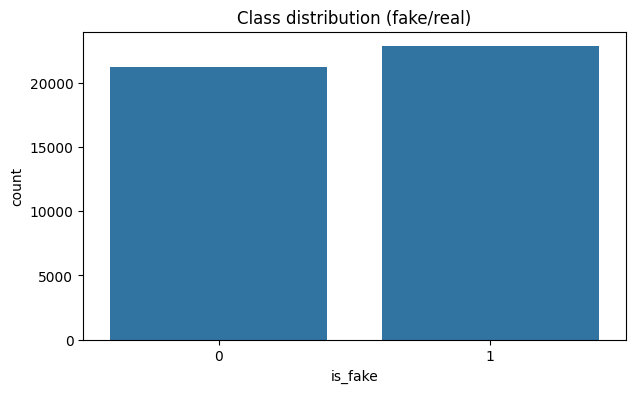

In [51]:
sns.countplot(x='is_fake', data=df)
plt.title('Class distribution (fake/real)')
plt.show()

In [57]:
df['text_length'] = df['text'].apply(len)
px.histogram(df, x='text_length', title='Histogram of text lengths').show()

In [58]:
px.histogram(df, x='text_length', color='is_fake', barmode='overlay',
             title='Histogram of text lengths by class').show()

In [59]:
df['len_title'] = df['title'].apply(len)
df['len_text'] = df['text'].apply(len)

In [60]:
temp_df = pd.melt(df,
                  value_vars=['len_title', 'len_text'],
                  id_vars=['is_fake'])
print(temp_df.head())

   is_fake   variable  value
0        0  len_title     36
1        1  len_title    149
2        0  len_title     61
3        0  len_title     62
4        0  len_title     59


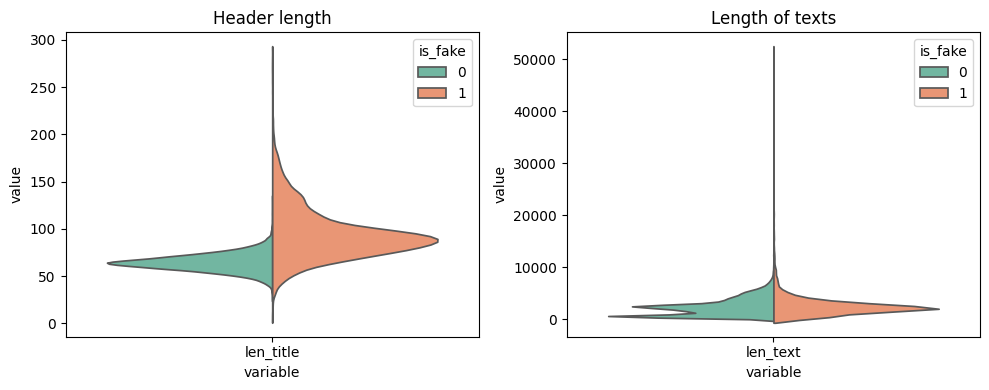

In [63]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.violinplot(
    data=temp_df[temp_df['variable'] == 'len_title'],
    x='variable', y='value', hue='is_fake', split=True, inner=None, palette='Set2'
)
plt.title('Header length')

plt.subplot(1, 2, 2)
sns.violinplot(
    data=temp_df[temp_df['variable'] == 'len_text'],
    x='variable', y='value', hue='is_fake', split=True, inner=None, palette='Set2'
)
plt.title('Length of texts')

plt.tight_layout()
plt.show()

<ipython-input-64-2720176998>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




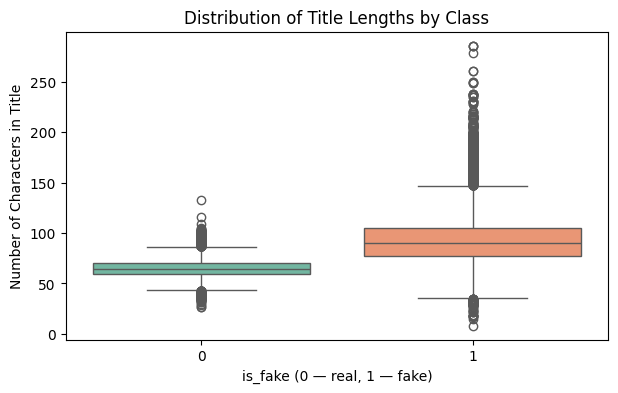

In [64]:
palette = 'Set2'

sns.boxplot(
    data=df,
    x='is_fake',
    y='len_title',
    palette=palette
)
plt.title('Distribution of Title Lengths by Class')
plt.xlabel('is_fake (0 — real, 1 — fake)')
plt.ylabel('Number of Characters in Title')
plt.show()

<ipython-input-65-3578349976>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




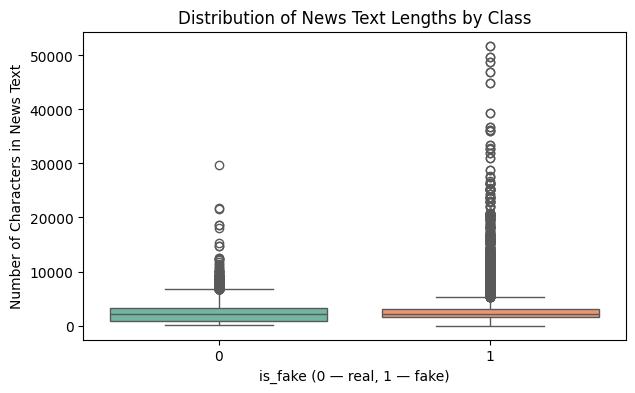

In [65]:
sns.boxplot(
    data=df,
    x='is_fake',
    y='len_text',
    palette=palette
)
plt.title('Distribution of News Text Lengths by Class')
plt.xlabel('is_fake (0 — real, 1 — fake)')
plt.ylabel('Number of Characters in News Text')
plt.show()

## Word Count

Checking the distribution of word count in each question.

In [87]:
title_word_count = df['title'].str.split().str.len()
text_word_count = df['text'].str.split().str.len()

In [88]:
title_word_count.describe()

,title
count,44049.000000
mean,12.433858
std,4.100373
min,1.000000
25%,10.000000
50%,11.000000
75%,14.000000
max,42.000000


In [89]:
text_word_count.describe()

,text
count,44049.000000
mean,410.850167
std,350.688975
min,1.000000
25%,213.000000
50%,365.000000
75%,516.000000
max,8135.000000


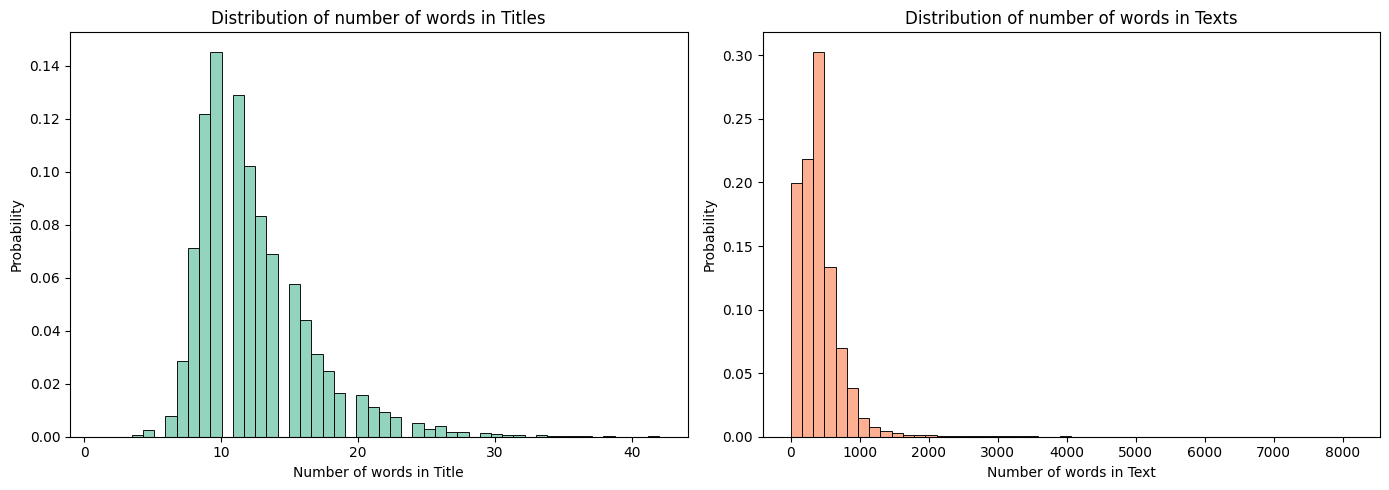

In [91]:
palette = sns.color_palette('Set2')

plt.figure(figsize=(14, 5))


plt.subplot(1, 2, 1)
sns.histplot(
    title_word_count,
    bins=50,
    color=palette[0],
    alpha=0.7,
    stat='probability'
)
plt.title('Distribution of number of words in Titles')
plt.xlabel('Number of words in Title')
plt.ylabel('Probability')


plt.subplot(1, 2, 2)
sns.histplot(
    text_word_count,
    bins=50,
    color=palette[1],
    alpha=0.7,
    stat='probability'
)
plt.title('Distribution of number of words in Texts')
plt.xlabel('Number of words in Text')
plt.ylabel('Probability')

plt.tight_layout()
plt.show()

Titles are easy to process as short sentences.

News texts vary widely in length; you should be careful with extremely long texts:

In many machine learning tasks, it’s common to set a maximum length for text (500–1,000 words) or to truncate overly long texts.

It may be useful to analyze the very long news texts separately, as they could represent noise or outliers in your dataset.

The average or median length of text might be a useful feature for your model (fake news might be typically shorter, or, in some cases, longer than real news).

In [93]:
df['title_word_count'] = df['title'].str.split().str.len()
df['text_word_count'] = df['text'].str.split().str.len()

<ipython-input-94-1593622446>:4: UserWarning:

The palette list has more values (8) than needed (2), which may not be intended.



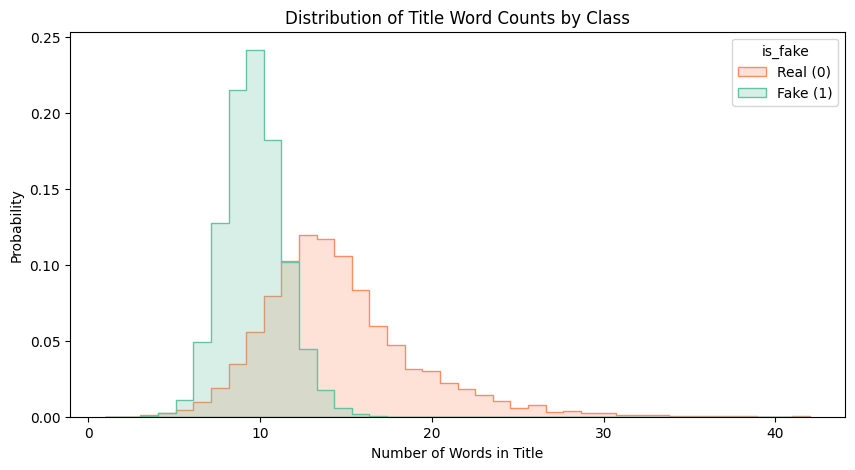

In [94]:
plt.figure(figsize=(10, 5))
palette = sns.color_palette('Set2')

sns.histplot(
    data=df,
    x='title_word_count',
    hue='is_fake',
    bins=40,
    stat='probability',
    element='step',
    palette=palette,
    common_norm=False
)
plt.title('Distribution of Title Word Counts by Class')
plt.xlabel('Number of Words in Title')
plt.ylabel('Probability')
plt.legend(title='is_fake', labels=['Real (0)', 'Fake (1)'])
plt.show()

Fake news titles tend to be much shorter and more uniform in length.

Real news titles are, on average, longer and more variable.

This difference can be a useful feature for your classifier:
“If the title is short, it’s more likely to be fake; if it’s long, it’s more likely to be real.”

<ipython-input-95-1593622446>:4: UserWarning:

The palette list has more values (8) than needed (2), which may not be intended.



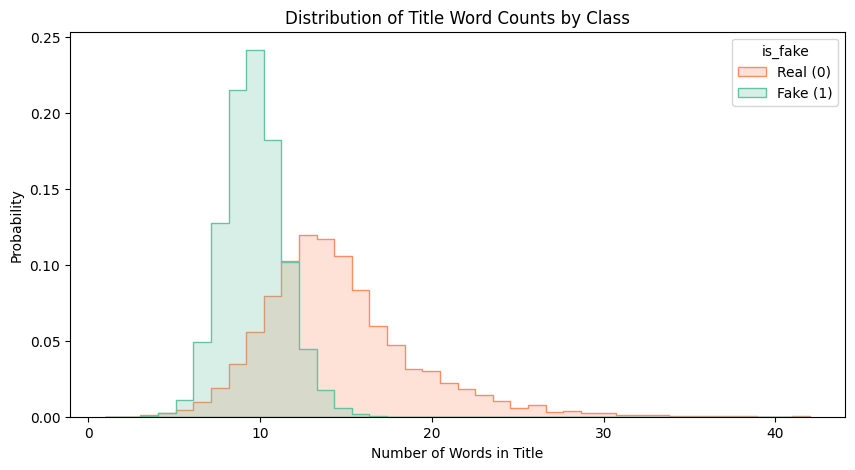

In [95]:
plt.figure(figsize=(10, 5))
palette = sns.color_palette('Set2')

sns.histplot(
    data=df,
    x='title_word_count',
    hue='is_fake',
    bins=40,
    stat='probability',
    element='step',
    palette=palette,
    common_norm=False
)
plt.title('Distribution of Title Word Counts by Class')
plt.xlabel('Number of Words in Title')
plt.ylabel('Probability')
plt.legend(title='is_fake', labels=['Real (0)', 'Fake (1)'])
plt.show()

Fake news headlines are significantly shorter and more uniform.

Real news headlines are more diverse and longer on average.

Title length could be a powerful feature for fake news detection.

In [96]:
# For titles
df['title_unique_word_count'] = df['title'].apply(lambda x: len(set(str(x).split())))

# For texts
df['text_unique_word_count'] = df['text'].apply(lambda x: len(set(str(x).split())))


<ipython-input-97-4277467147>:4: UserWarning:

The palette list has more values (8) than needed (2), which may not be intended.



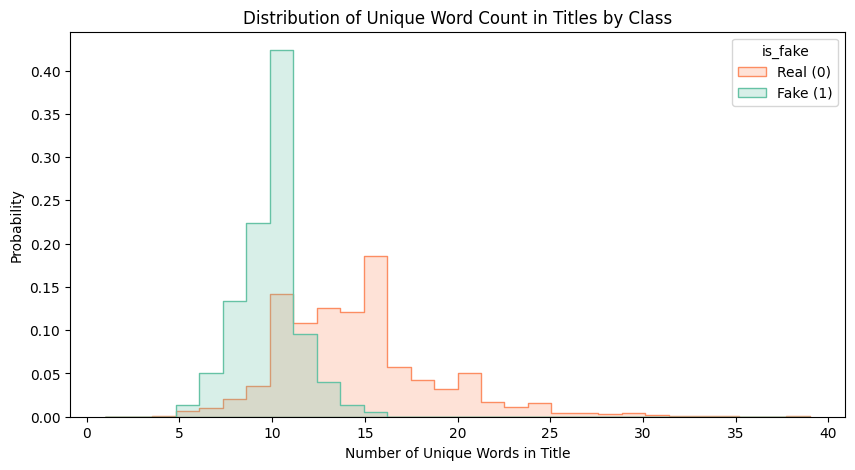

In [97]:
plt.figure(figsize=(10, 5))
palette = sns.color_palette('Set2')

sns.histplot(
    data=df,
    x='title_unique_word_count',
    hue='is_fake',
    bins=30,
    stat='probability',
    element='step',
    palette=palette,
    common_norm=False
)
plt.title('Distribution of Unique Word Count in Titles by Class')
plt.xlabel('Number of Unique Words in Title')
plt.ylabel('Probability')
plt.legend(title='is_fake', labels=['Real (0)', 'Fake (1)'])
plt.show()

Fake news titles tend to use a much more limited set of unique words—they are not only shorter in length, but also less diverse in vocabulary.

Real news titles have more unique words on average, suggesting more complex and varied headlines.

This difference in unique word count is a strong signal and could be a valuable feature for your fake news classifier.

# Semantic Analysis

In [98]:
# Title
df['title_question_marks'] = df['title'].apply(lambda x: str(x).count('?'))
df['title_exclamation_marks'] = df['title'].apply(lambda x: str(x).count('!'))
df['title_dots'] = df['title'].apply(lambda x: str(x).count('.'))
df['title_punctuations'] = df['title'].apply(lambda x: sum(1 for c in str(x) if c in string.punctuation))
df['title_numbers'] = df['title'].apply(lambda x: sum(1 for c in str(x) if c.isdigit()))

# Text
df['text_question_marks'] = df['text'].apply(lambda x: str(x).count('?'))
df['text_exclamation_marks'] = df['text'].apply(lambda x: str(x).count('!'))
df['text_dots'] = df['text'].apply(lambda x: str(x).count('.'))
df['text_punctuations'] = df['text'].apply(lambda x: sum(1 for c in str(x) if c in string.punctuation))
df['text_numbers'] = df['text'].apply(lambda x: sum(1 for c in str(x) if c.isdigit()))


In [99]:
print(df.groupby('is_fake')['text_exclamation_marks'].describe())
print(df.groupby('is_fake')['text_question_marks'].describe())
print(df.groupby('is_fake')['text_punctuations'].describe())

           count      mean       std  min  25%  50%  75%    max
is_fake                                                        
0        21210.0  0.062093  0.419098  0.0  0.0  0.0  0.0   12.0
1        22839.0  0.743071  1.942180  0.0  0.0  0.0  1.0  133.0
           count      mean       std  min  25%  50%  75%   max
is_fake                                                       
0        21210.0  0.100330  0.631818  0.0  0.0  0.0  0.0  57.0
1        22839.0  1.239415  2.306235  0.0  0.0  0.0  2.0  94.0
           count       mean        std  min   25%   50%   75%     max
is_fake                                                              
0        21210.0  50.532249  36.733632  4.0  21.0  45.0  68.0   595.0
1        22839.0  60.729279  82.382751  0.0  32.0  48.0  71.0  7295.0


In [100]:
# ALL CAPS
df['title_words_upper'] = df['title'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
df['text_words_upper'] = df['text'].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

# Title Case
df['title_words_titlecase'] = df['title'].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
df['text_words_titlecase'] = df['text'].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))


In [101]:
print(df.groupby('is_fake')['title_words_upper'].describe())
print(df.groupby('is_fake')['title_words_titlecase'].describe())

           count      mean       std  min  25%  50%  75%   max
is_fake                                                       
0        21210.0  0.386421  0.576747  0.0  0.0  0.0  1.0   5.0
1        22839.0  3.207496  2.952344  0.0  1.0  2.0  5.0  24.0
           count       mean       std  min  25%   50%   75%   max
is_fake                                                          
0        21210.0   2.580952  1.290212  0.0  2.0   2.0   3.0  10.0
1        22839.0  10.452997  4.152077  0.0  8.0  11.0  13.0  31.0


## Matching Words

In [106]:
def get_match_words_list(q1, q2):
    q1 = set(str(q1).split())
    q2 = set(str(q2).split())
    return list(q1.intersection(q2))

df['match_words'] = df.apply(lambda row: get_match_words_list(row['title'], row['text']), axis=1)
df['count_match_words'] = df['match_words'].apply(len)

df[['match_words', 'count_match_words', 'is_fake']]

,match_words,count_match_words,is_fake
0,"[Papua, New, Guinea, off]",4,0
1,"[John, Trump]",2,1
2,"[Hastert, Speaker, Prosecutors, abused, sexual...",6,0
3,"[of, protesters, protest, Romanian, fair, buil...",8,0
4,"[to, U.N., elected, rights, Congo, Britain,, U...",7,0
...,...,...,...
44675,"[to, fundraising, ordered, In, foundation]",5,0
44676,"[Middle, East, Sharia, Muslim]",4,1
44677,[Hilarity],1,1
44678,[],0,1


<ipython-input-107-3390591391>:3: UserWarning:

The palette list has more values (8) than needed (2), which may not be intended.



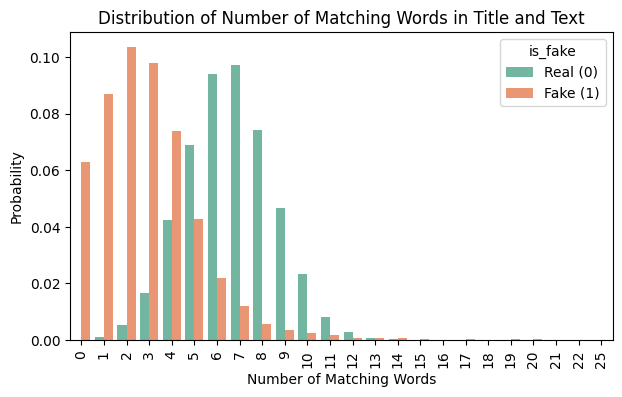

In [107]:
palette = sns.color_palette('Set2')

sns.countplot(
    data=df,
    x='count_match_words',
    hue='is_fake',
    palette=palette,
    stat='probability'
)
plt.title('Distribution of Number of Matching Words in Title and Text')
plt.xlabel('Number of Matching Words')
plt.ylabel('Probability')
plt.xticks(rotation=90)
plt.legend(title='is_fake', labels=['Real (0)', 'Fake (1)'])
plt.show()

Fake news headlines tend to be more different from the article text-they might be clickbait, exaggerating, or using attention-grabbing language that isn’t actually in the article body.

Real news headlines are more likely to repeat or closely match the vocabulary of the article text—they summarize rather than sensationalize.

This feature is a good discriminator for your fake news classifier!

## Most Common Words

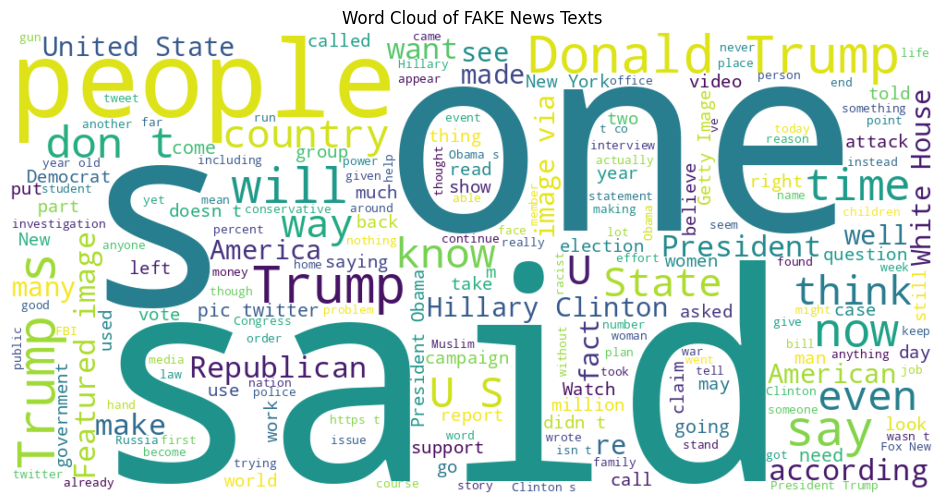

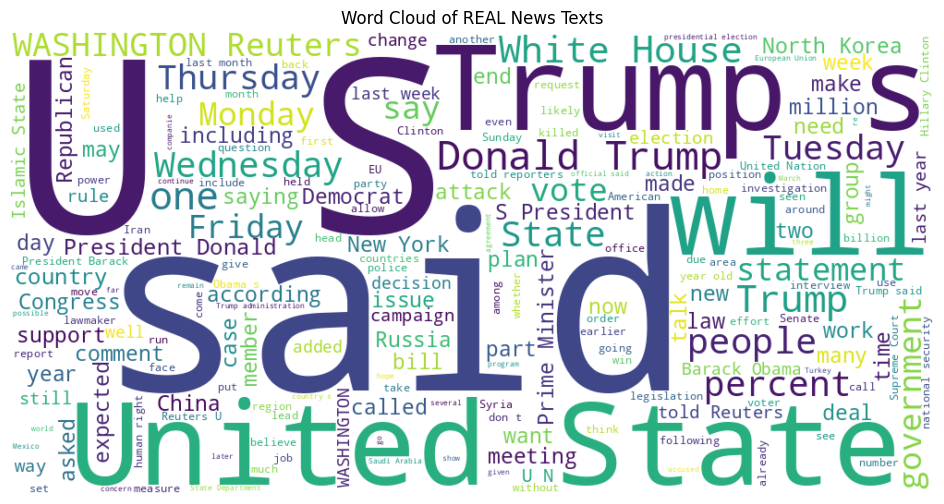

In [108]:
#Fake news
text_fake = ' '.join(df[df['is_fake']==1]['text'].astype(str))
cloud_fake = WordCloud(width=1000, height=500, background_color='white', random_state=7).generate(text_fake)
plt.figure(figsize=(12, 6))
plt.imshow(cloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of FAKE News Texts')
plt.show()

#Real news
text_real = ' '.join(df[df['is_fake']==0]['text'].astype(str))
cloud_real = WordCloud(width=1000, height=500, background_color='white', random_state=7).generate(text_real)
plt.figure(figsize=(12, 6))
plt.imshow(cloud_real, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of REAL News Texts')
plt.show()